In [1]:
import pandas as pd

df= pd.read_csv("data.csv")

In [2]:
# Need to change some types for the categorical columns 

In [3]:
df['Groups'] = df['Groups'].astype('category')
df['Year'] = df['Year'].astype('category')

In [4]:
numerical_columns = df.select_dtypes(include='number')
categorical_columns = df.select_dtypes(include='object')
display(numerical_columns)
X= numerical_columns
y=df["AMR(%)"] # Target


,AMR(%),Meat(kg/pers)(2002),Meat(kg/pers)(2009),Meat(kg/pers)(2020)
0,14.29,94.1,102.0,87.23
1,15.14,86.1,76.9,65.78
2,28.57,69.4,53.0,58.32
3,23.81,49.9,66.3,75.30
4,16.67,67.4,59.6,63.64
...,...,...,...,...
99,78.57,54.5,64.7,63.92
100,66.67,67.4,60.4,59.35
101,50.00,88.0,88.3,76.40
102,30.87,118.6,97.0,100.26


### Correlation Matrix 

In [7]:
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'AMR(%)'),
  Text(0, 1.5, 'Meat(kg/pers)(2002)'),
  Text(0, 2.5, 'Meat(kg/pers)(2009)'),
  Text(0, 3.5, 'Meat(kg/pers)(2020)')])

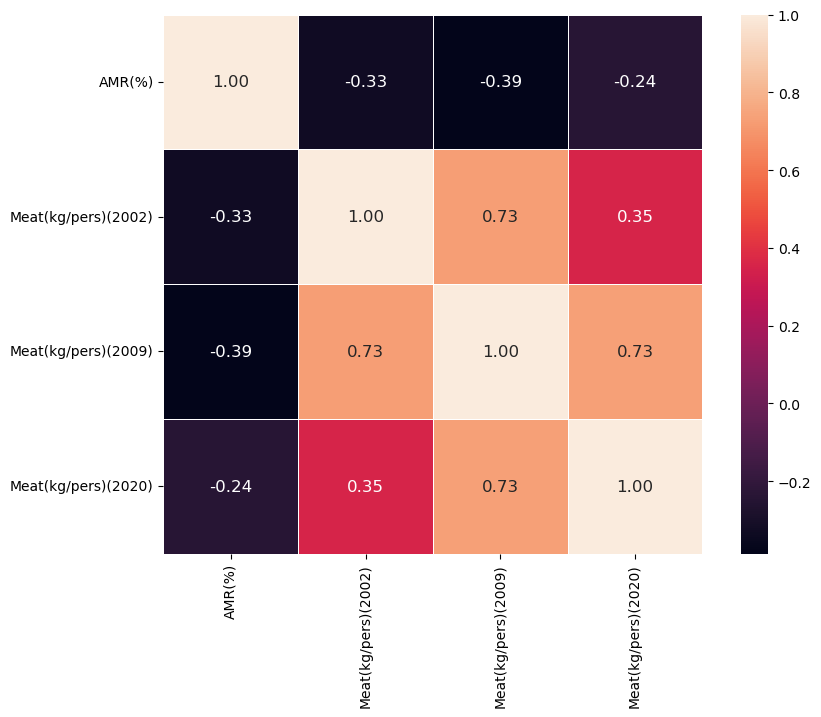

In [8]:
corr_matrix_b = numerical_columns.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_b, annot=True,fmt=".2f", linewidths=0.5, annot_kws={"size": 12}, square= True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In this case the correlation matrix is not showing a lot of info. There are no conclusions for this.  

In [9]:
df.dtypes

Pathogen/Antibiotic      object
Year                   category
Country                  object
Groups                 category
AMR(%)                  float64
Meat(kg/pers)(2002)     float64
Meat(kg/pers)(2009)     float64
Meat(kg/pers)(2020)     float64
dtype: object

### Histograms

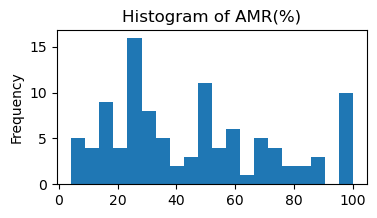

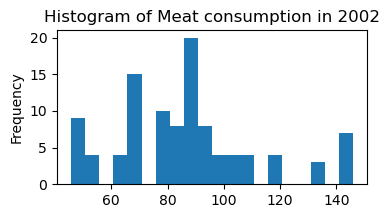

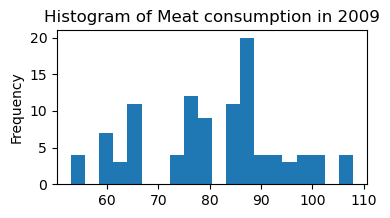

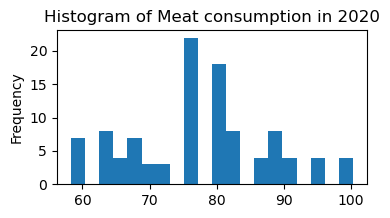

In [10]:
# Histogram for 'AMR(%)'
plt.figure(figsize=(4, 2))
hist = df['AMR(%)'].plot.hist(bins=20)
hist.set_title('Histogram of AMR(%)')
plt.show()

# Histogram for 'kg/person (2002)'
plt.figure(figsize=(4, 2))
hist = df['Meat(kg/pers)(2002)'].plot.hist(bins=20)
hist.set_title('Histogram of Meat consumption in 2002')
plt.show()

# Histogram for 'kg/person (2009)'
plt.figure(figsize=(4, 2))
hist = df['Meat(kg/pers)(2009)'].plot.hist(bins=20)
hist.set_title('Histogram of Meat consumption in 2009')
plt.show()

# Histogram for 'kg/person (2020)'
plt.figure(figsize=(4, 2))
hist = df['Meat(kg/pers)(2020)'].plot.hist(bins=20)
hist.set_title('Histogram of Meat consumption in 2020')
plt.show()



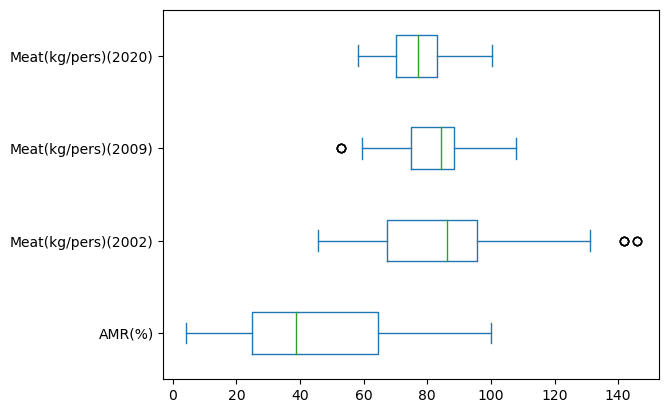

In [11]:
box= df.plot.box(vert=False)

Histograms and boxplot are sowing some outliers. 

### Cleaning the outliers 

In [12]:
def outliers(column, threshold = 2):
   
    df = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return df

In [13]:
CLV_outliers1 = outliers(df["Meat(kg/pers)(2002)"]) # From Erin deleting outliers 
len(CLV_outliers1)

7

In [14]:
CLV_outliers2 = outliers(df["Meat(kg/pers)(2009)"]) # From Erin deleting outliers 
len(CLV_outliers2)

8

In [15]:
CLV_outliers3 = outliers(df["Meat(kg/pers)(2020)"]) # From Erin deleting outliers 
len(CLV_outliers3)

4

In [16]:
df['Groups']

0      2
1      6
2      1
3      1
4      6
      ..
99     1
100    1
101    2
102    6
103    1
Name: Groups, Length: 104, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

We're not going to drop the outliers because all of them belong to the main category in Groups (female)

### Bar Plot

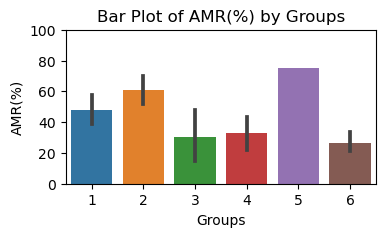

In [17]:
plt.figure(figsize=(4, 2))
plt.ylim(0, 100) 
sns.barplot(x='Groups', y='AMR(%)', data=df, order=[1, 2, 3, 4, 5, 6])
plt.xlabel('Groups')
plt.ylabel('AMR(%)')
plt.title('Bar Plot of AMR(%) by Groups')
plt.show()
#This is the coding for 'Category'{'0-4': 1, '5-18': 2, '19-64': 3, '65+': 4, 'Female': 5, 'Male': 6}
# Value corresponds to % of resistant isolates proportion (by age or by gender) of E.Coli and K.pneumoniae front of 5 atibiotics (AMR)

The group more afected by the AMR are the womens followed by the group corresponding to ages between 19-64.
Followed the babys and litle kidsuntil 4 years with a value aprox 50% of AMR. The group less afected are mens. 


### Pi Chart 

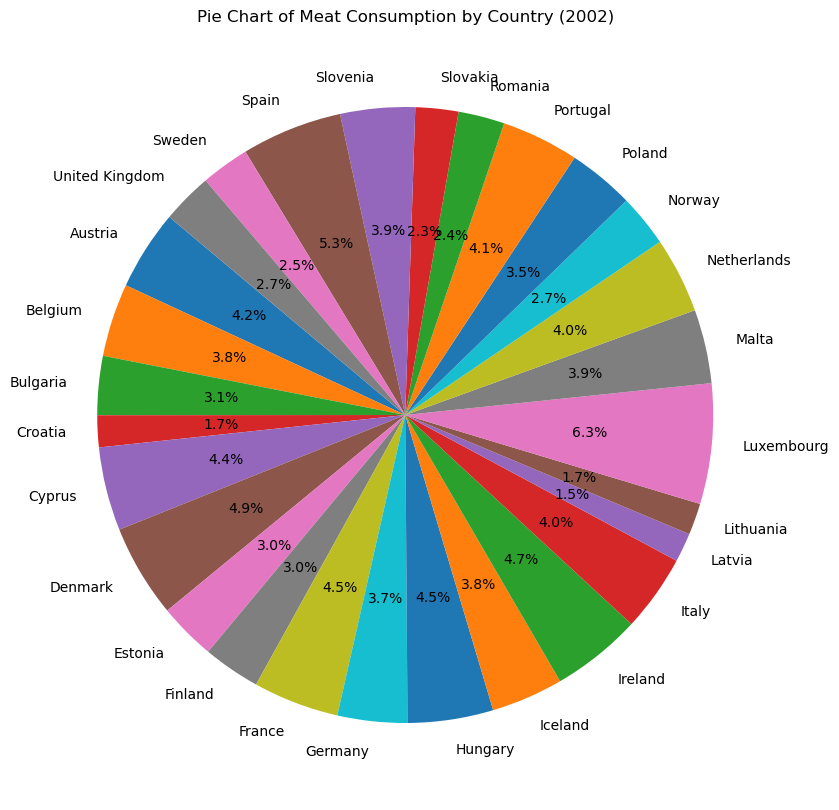

In [18]:
country_meat_sum = df.groupby('Country')['Meat(kg/pers)(2002)'].sum()

# Crear el pie chart
plt.figure(figsize=(10, 10))  # Tamaño de la figura (opcional)
plt.pie(country_meat_sum, labels=country_meat_sum.index, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Pie Chart of Meat Consumption by Country (2002)')

# Mostrar el gráfico
plt.show()

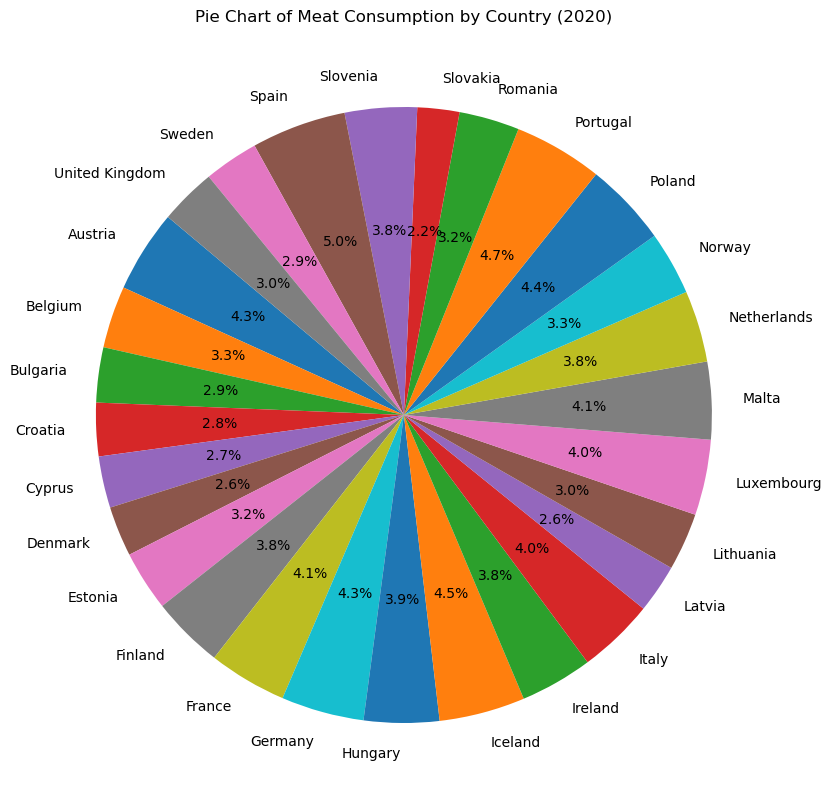

In [19]:
country_meat_sum = df.groupby('Country')['Meat(kg/pers)(2020)'].sum()

# Creating the pie Chart
plt.figure(figsize=(10, 10))  # Size
plt.pie(country_meat_sum, labels=country_meat_sum.index, autopct='%1.1f%%', startangle=140)

# Tittle
plt.title('Pie Chart of Meat Consumption by Country (2020)')


plt.show()

A lot of conclusions comparing 2002 with 2022. In 20 years there are countries that don't chage the habits and others even had increased in the consumption of this product despite of the contamination and health. More conclusions in the presentation. 

### Scatter plot

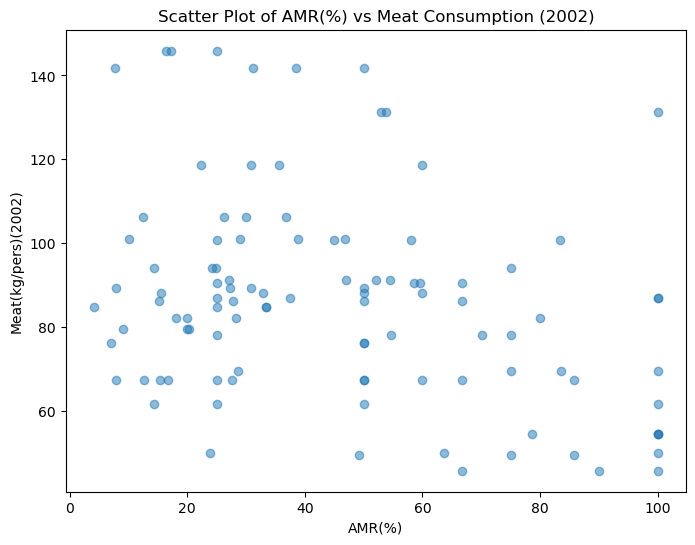

In [20]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['AMR(%)'], df['Meat(kg/pers)(2002)'], alpha=0.5)

# Labels
plt.xlabel('AMR(%)')
plt.ylabel('Meat(kg/pers)(2002)')

# Title
plt.title('Scatter Plot of AMR(%) vs Meat Consumption (2002)')

plt.show()

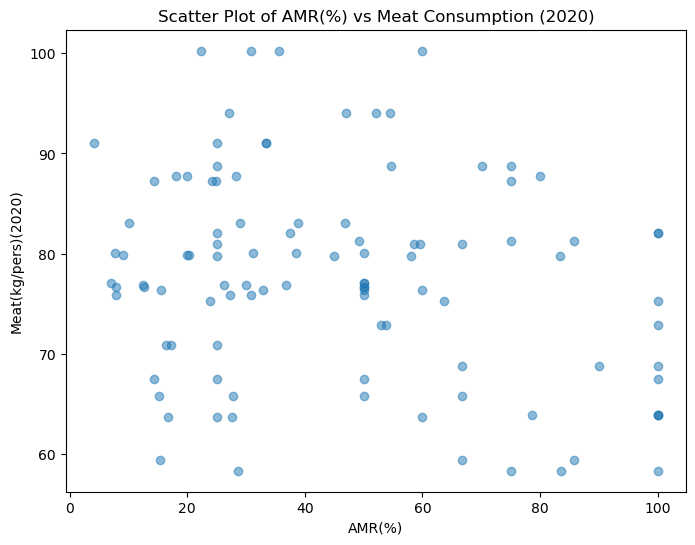

In [21]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['AMR(%)'], df['Meat(kg/pers)(2020)'], alpha=0.5)

plt.xlabel('AMR(%)')
plt.ylabel('Meat(kg/pers)(2020)')

plt.title('Scatter Plot of AMR(%) vs Meat Consumption (2020)')

plt.show()

The linear tendency is not easy to see in the scatterplots. Let's see the model.

### Linear Regression

In [22]:
# Train Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
# Sclaing 
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)
X_train_scale = pd.DataFrame(transformer.transform(X_train),columns = X_train.columns)
X_test_scale = pd.DataFrame(transformer.transform(X_test),columns = X_test.columns)

In [24]:
# We're not going to use encoding because consider 'Groups'for the model has no sense. 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # Assuming 'X' contains your features and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scale, y_train)

# Make predictions
predictions_LR = linear_reg.predict(X_test_scale)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions_LR, squared=False)
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 33.982794396341184


In [26]:
predictedDF_LR= pd.DataFrame(predictions_LR, y_test)
predictedDF_LR.head(10)

,0
AMR(%),
12.61,23.055289
50.00,36.043957
75.00,45.427495
53.85,49.674367
100.00,43.445918
38.46,48.414023
100.00,36.099855
35.64,52.254729
12.50,59.974726


### KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scale, y_train)

# Make predictions
predictions_knn = knn.predict(X_test_scale)
print("predictions&yteset:", predictions_knn ,y_test)
# Calculate RMSE
rmse = mean_squared_error(y_test, predictions_knn, squared=False)
print("KNN RMSE:", rmse)

predictions&yteset: [36.668 32.092 40.714 65.334 32.092 54.728 55.864 48.56  37.34  54.728
 40.738 45.968 50.578 48.384 57.52  61.31  27.712 70.264 38.556 54.22
 55.264] 30     12.61
65     50.00
64     75.00
53     53.85
45    100.00
93     38.46
91    100.00
47     35.64
10     12.50
0      14.29
18    100.00
31     46.88
88     25.00
95     50.00
77     75.00
4      16.67
80    100.00
33     58.06
12      7.78
26     75.00
98     52.04
Name: AMR(%), dtype: float64
KNN RMSE: 34.283141593556


In [28]:
predictedDF= pd.DataFrame(predictions_knn, y_test)
predictedDF.head(10)

,0
AMR(%),
12.61,36.668
50.00,32.092
75.00,40.714
53.85,65.334
100.00,32.092
38.46,54.728
100.00,55.864
35.64,48.560
12.50,37.340


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
random_forest = RandomForestRegressor(n_estimators=5, random_state=42)
random_forest.fit(X_train_scale, y_train)

# Make predictions
predictions_RF = random_forest.predict(X_test_scale)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions_RF, squared=False)
print("Random Forest RMSE:", rmse)

Random Forest RMSE: 35.57545274885078


In [30]:
predictedDF_RF= pd.DataFrame(predictions_RF, y_test)
predictedDF_RF.head(10)

,0
AMR(%),
12.61,27.928
50.00,20.030
75.00,50.214
53.85,51.426
100.00,24.196
38.46,47.522
100.00,47.054
35.64,62.580
12.50,48.316


Any of the 3 models have good results so this could be because at the end I finished the data with too few values. 
Things that maybe could be applied to achive this could be cross-validation or feature selection.
Best solution would be increase the data. 